In [1]:
import numpy as np
from sklearn.cluster import KMeans
import torch

In [2]:
N = 300
tensor = torch.load('../data/resnet50_tensor.pt').numpy()
print('tensor finished')
kmeans_model = KMeans(n_clusters=N, random_state=10).fit(tensor)

# 分類先となったラベルを取得する
labels = kmeans_model.labels_

tensor finished


In [3]:
with open(f'cluster_label_{N}.txt', 'w') as f:
    [f.write(f'{l}\n') for l in labels]

In [4]:
center_vectors = np.array([])
for l in range(N):
    center_vector = np.mean(tensor[labels == l], axis = 0)
    # print(center_vector.shape, tensor[labels == l].shape)
    center_vectors = np.append(center_vectors, center_vector, axis=0)
center_vectors = center_vectors.reshape(N, 768)
print(center_vectors.shape)
center_tensors = torch.from_numpy(center_vectors.astype(np.float32)).clone()
torch.save(center_tensors, './center_tensors.pt')

(300, 768)


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.manifold import TSNE

In [6]:
p = torch.ones(len(tensor))
index = p.multinomial(num_samples=40000, replacement=False)
sampling_tensor = tensor[index]
sampling_label = np.array(labels)
sampling_label = sampling_label[index]

In [7]:
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(sampling_tensor)
X = pd.DataFrame(X_embedded, columns = ['col1', 'col2'])

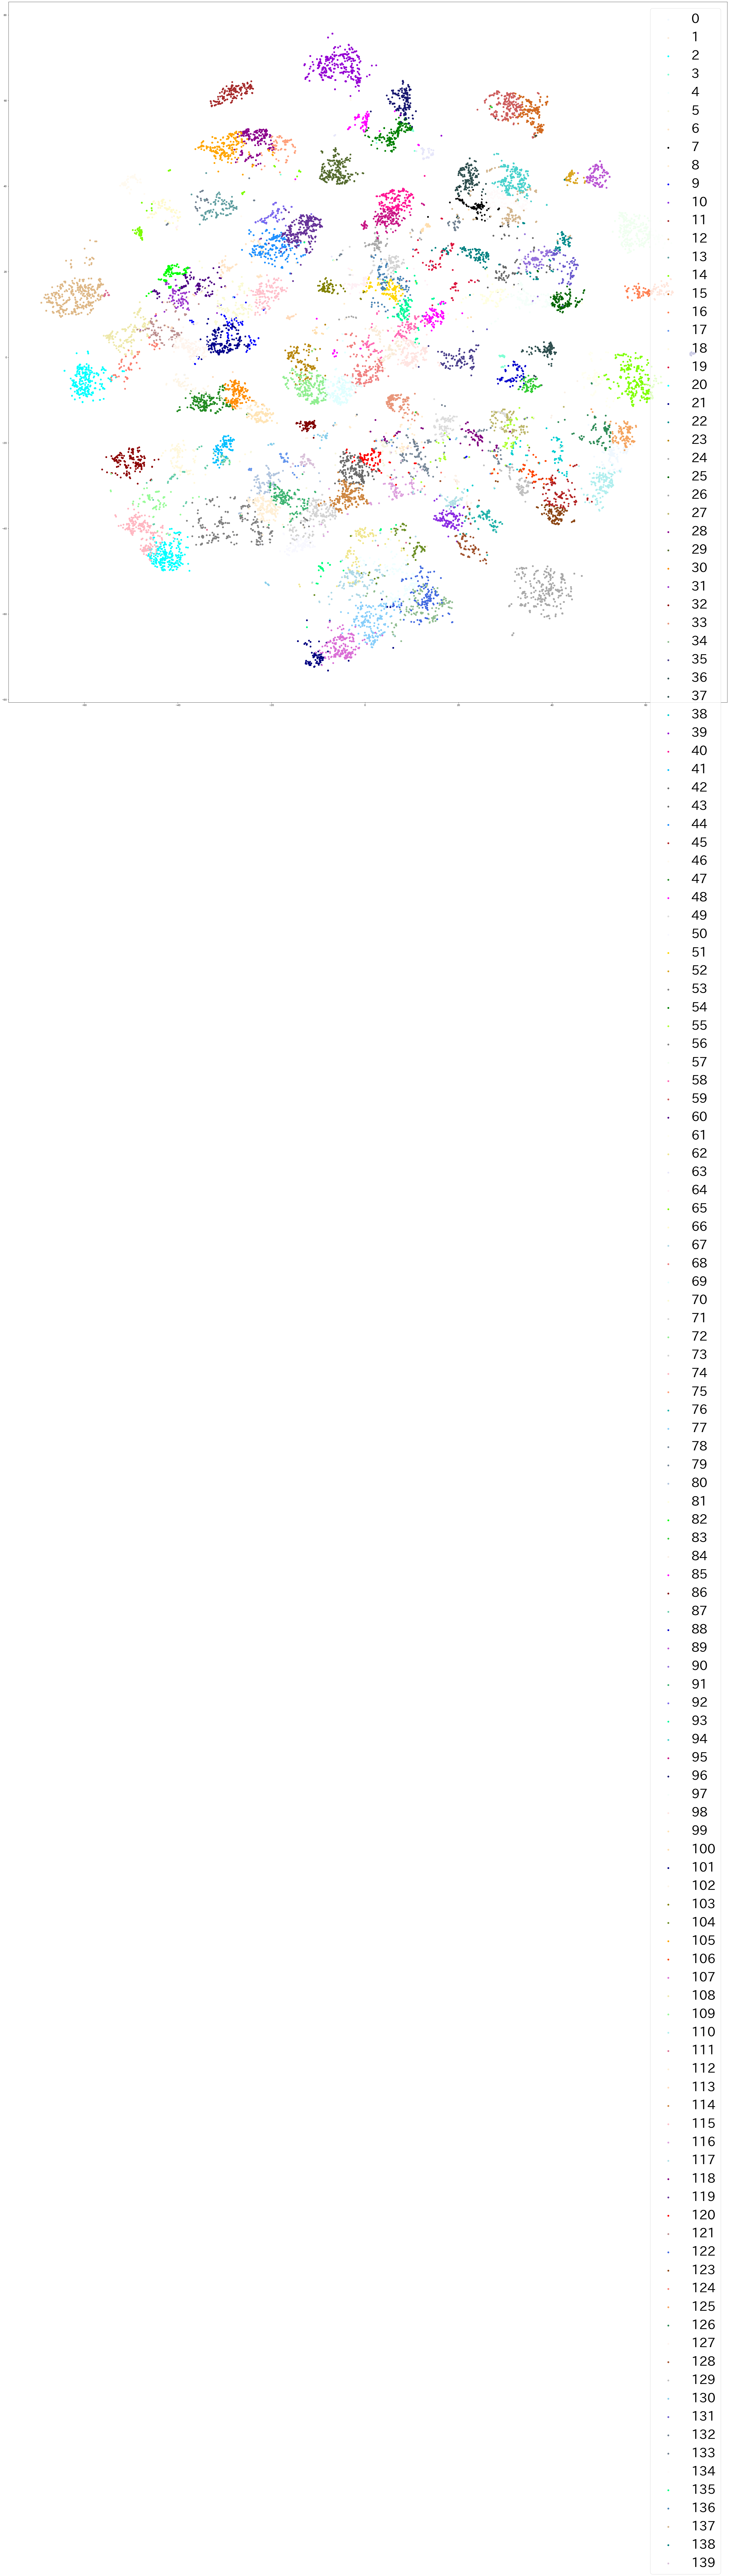

In [8]:
import numpy as np
import matplotlib
import japanize_matplotlib
fig = plt.figure(figsize = (50, 50))
colors = list(matplotlib.colors.CSS4_COLORS.values())
for i, v in enumerate(range(140)):
    category_mask = sampling_label == np.array(v)
    tmp_df = X[category_mask]
    # print(tmp_df)
    plt.scatter(tmp_df['col1'],
                tmp_df['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 50)
fig.savefig('clustering_300.png')